### 과제
[AI Hub](https://www.aihub.or.kr/)에 공개되어 있는 한국어 도서 요약 데이터셋을 활용하여 한국어 워드 임베딩 구축

In [63]:
!pip install konlpy

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from gensim.models.word2vec import Word2Vec
from konlpy.tag import Okt

In [65]:
# with open('/content/drive/MyDrive/modi_output.txt', 'r') as file:
#     contents = file.read()
#     word_list = contents.split()  # 띄어쓰기로 분할하여 리스트로 반환
#     print(word_list)

In [66]:
# dataset = contents(shuffle=True, random_state=10, remove=('headers', 'footers', 'quotes'))
# # dataset
# # dataset.data
# dataset = dataset.data

In [67]:
# contents[0]

In [68]:
# len(contents)

In [69]:
# contents

In [70]:
# new_df = pd.DataFrame({'document': contents}, index=[0])

In [71]:
# new_df

In [72]:
train = pd.read_csv('/content/drive/MyDrive/modi_output.txt', delimiter='\t', usecols=[0, 1])

In [73]:
train

,자신의 생각을 불명확하게 표현하는 사람들은 생각도 불명확할 가능성이 높다. 따라서 생각을 명료하게 정리하는 것이 명확한 글쓰기의 시작이다. 존 케네스 갈브레이드(John Kenneth Galbraith) 교수는 “아무리 복잡하고 어려운 주제라고 명쾌한 언어로 설명이 가능하다. 하지만 필자가 그 주제에 대해 완전히 이해하지 못하면 절대로 명확하게 쓸 수 없다.”고 했다. 명료한 글은 명료한 생각에서 나온다. 그렇지만 글을 고치다보면 생각도 명료하게 된다. 명료하게 쓰려면 내용을 단순화해야 한다. 많은 것을 전달하려는 욕심을 버리고 한두가지로 선택하고 거기 집중해야 한다. 앞에서 이야기한 간결성은 명확성에 도움이 된다. 명료함은 복잡한 설득기법을 사용하는 것보다 더 중요하다. 판사는 이해할 수 없는 사실관계 진술로는 설득되지 않는다. 설득기법이 명료함을 해치는 때에는 그 기법을 사용하지 않는다.,주제가 아무리 복잡하고 어려울 지라도 필자가 주제에 대해 완벽하게 이해하고 있다면 명확한 글쓰기는 당연 가능하다. 명확한 글쓰기를 할 때 가장 중요한 점은 내용의 단순화 및 간결성이고 많은 것을 전달하려는 욕심을 버리는 것이다.
0,진로체험의 운영 역량을 강화하기 위하여 단위학교의 담당교사 외 에도 진로체험을 인솔...,"진로체험을 위해서 교사 외에도 인솔, 안전 등의 일용직 인력이 필요하다. 재정과 고..."
1,"매우 최근 의견에서, Mary Footer는 이 논쟁을 한발 더 진전시켰다. 그녀는...",Mary Footer는 최근에 WTO법의 모순을 해결하기 위해 다섯가지를 제안했다....
2,에너지원별 소비 비중의 변화에서 눈에 띄는 것은 전력비중이 1981년에 비해 2배 ...,"에너지원별 소비 비중 중 전력비중은 지속적으로 증가하였고, 이것은 원자력 발전 설비..."
3,"강원의 주류 기술지식 영역과 전략산업을 살펴보면 웰니스식품, 스포츠지식서비스, 의료...","강원의 주류 기술지식과 전략산업에는 웰니스식품, 스포츠지식서비스, 의료기기, 바이오..."
4,"그렇다면 실질과세를 적요하기 위해서도 페이퍼컴퍼니의 판단기준이 필요한데, 이는 주식...",실질과세의 적용을 위해 페이퍼컴퍼니의 판단기준이 필요하다. 주식의 이동경위와 실질적...
...,...,...
159503,유기성 폐기물 에너지화 시설 확대의 속성별 MWTP를 추정한 결과는 <표 5>에 제...,"한정애안과 양창영안은 등록제를 제안하고, 장하나안과 유럽연합은 허가제·면허제를 도입..."
159504,일반적으로 정비하천은 자연하천에 비해 댐이나 보 등의 영향으로 하천유량이 많고 유속...,토지이용의 변화로 탄소가 풍부한 유출물 침전과 지표유출수 내 고형물 퇴적은 정비하천...
159505,NCATS는 CTSA 사업 이외에도 임상으로의 중개를 위해 다양한 사업들을 진행하는...,"NCATS는 이 외에도 여러 사업들을 진행하는데, 대부분이 공동연구이다. 약물 개발..."
159506,해외 TA 방식과 또 다른 차이점으로는 국내의 경우에는 평가기술에 대한 과학적 지식...,"국내는 평가기술에 대한 과학적 지식, 경제성 분석, 사회적 효과가 하나의 보고서 안..."


In [74]:
train = train.rename(columns={'자신의 생각을 불명확하게 표현하는 사람들은 생각도 불명확할 가능성이 높다. 따라서 생각을 명료하게 정리하는 것이 명확한 글쓰기의 시작이다. 존 케네스 갈브레이드(John Kenneth Galbraith) 교수는 “아무리 복잡하고 어려운 주제라고 명쾌한 언어로 설명이 가능하다. 하지만 필자가 그 주제에 대해 완전히 이해하지 못하면 절대로 명확하게 쓸 수 없다.”고 했다. 명료한 글은 명료한 생각에서 나온다. 그렇지만 글을 고치다보면 생각도 명료하게 된다. 명료하게 쓰려면 내용을 단순화해야 한다. 많은 것을 전달하려는 욕심을 버리고 한두가지로 선택하고 거기 집중해야 한다. 앞에서 이야기한 간결성은 명확성에 도움이 된다. 명료함은 복잡한 설득기법을 사용하는 것보다 더 중요하다. 판사는 이해할 수 없는 사실관계 진술로는 설득되지 않는다. 설득기법이 명료함을 해치는 때에는 그 기법을 사용하지 않는다.': 'document1'})
train = train.rename(columns={'주제가 아무리 복잡하고 어려울 지라도 필자가 주제에 대해 완벽하게 이해하고 있다면 명확한 글쓰기는 당연 가능하다. 명확한 글쓰기를 할 때 가장 중요한 점은 내용의 단순화 및 간결성이고 많은 것을 전달하려는 욕심을 버리는 것이다.': 'document2'})
# 변경된 컬럼명 확인
print(train.columns)


Index(['document1', 'document2'], dtype='object')


In [75]:
train

,document1,document2
0,진로체험의 운영 역량을 강화하기 위하여 단위학교의 담당교사 외 에도 진로체험을 인솔...,"진로체험을 위해서 교사 외에도 인솔, 안전 등의 일용직 인력이 필요하다. 재정과 고..."
1,"매우 최근 의견에서, Mary Footer는 이 논쟁을 한발 더 진전시켰다. 그녀는...",Mary Footer는 최근에 WTO법의 모순을 해결하기 위해 다섯가지를 제안했다....
2,에너지원별 소비 비중의 변화에서 눈에 띄는 것은 전력비중이 1981년에 비해 2배 ...,"에너지원별 소비 비중 중 전력비중은 지속적으로 증가하였고, 이것은 원자력 발전 설비..."
3,"강원의 주류 기술지식 영역과 전략산업을 살펴보면 웰니스식품, 스포츠지식서비스, 의료...","강원의 주류 기술지식과 전략산업에는 웰니스식품, 스포츠지식서비스, 의료기기, 바이오..."
4,"그렇다면 실질과세를 적요하기 위해서도 페이퍼컴퍼니의 판단기준이 필요한데, 이는 주식...",실질과세의 적용을 위해 페이퍼컴퍼니의 판단기준이 필요하다. 주식의 이동경위와 실질적...
...,...,...
159503,유기성 폐기물 에너지화 시설 확대의 속성별 MWTP를 추정한 결과는 <표 5>에 제...,"한정애안과 양창영안은 등록제를 제안하고, 장하나안과 유럽연합은 허가제·면허제를 도입..."
159504,일반적으로 정비하천은 자연하천에 비해 댐이나 보 등의 영향으로 하천유량이 많고 유속...,토지이용의 변화로 탄소가 풍부한 유출물 침전과 지표유출수 내 고형물 퇴적은 정비하천...
159505,NCATS는 CTSA 사업 이외에도 임상으로의 중개를 위해 다양한 사업들을 진행하는...,"NCATS는 이 외에도 여러 사업들을 진행하는데, 대부분이 공동연구이다. 약물 개발..."
159506,해외 TA 방식과 또 다른 차이점으로는 국내의 경우에는 평가기술에 대한 과학적 지식...,"국내는 평가기술에 대한 과학적 지식, 경제성 분석, 사회적 효과가 하나의 보고서 안..."


In [76]:
# 두 열 합치기
train['document1'] = train['document1'] + train['document2']
train = train.drop(columns=['document2'])
# 결과 확인
print(train)

                                                document1
0       진로체험의 운영 역량을 강화하기 위하여 단위학교의 담당교사 외 에도 진로체험을 인솔...
1       매우 최근 의견에서, Mary Footer는 이 논쟁을 한발 더 진전시켰다. 그녀는...
2       에너지원별 소비 비중의 변화에서 눈에 띄는 것은 전력비중이 1981년에 비해 2배 ...
3       강원의 주류 기술지식 영역과 전략산업을 살펴보면 웰니스식품, 스포츠지식서비스, 의료...
4       그렇다면 실질과세를 적요하기 위해서도 페이퍼컴퍼니의 판단기준이 필요한데, 이는 주식...
...                                                   ...
159503  유기성 폐기물 에너지화 시설 확대의 속성별 MWTP를 추정한 결과는 <표 5>에 제...
159504  일반적으로 정비하천은 자연하천에 비해 댐이나 보 등의 영향으로 하천유량이 많고 유속...
159505  NCATS는 CTSA 사업 이외에도 임상으로의 중개를 위해 다양한 사업들을 진행하는...
159506  해외 TA 방식과 또 다른 차이점으로는 국내의 경우에는 평가기술에 대한 과학적 지식...
159507  Cincera et al.(2013)의 연구도 동일하다. EU Industrial ...

[159508 rows x 1 columns]


In [77]:
train

,document1
0,진로체험의 운영 역량을 강화하기 위하여 단위학교의 담당교사 외 에도 진로체험을 인솔...
1,"매우 최근 의견에서, Mary Footer는 이 논쟁을 한발 더 진전시켰다. 그녀는..."
2,에너지원별 소비 비중의 변화에서 눈에 띄는 것은 전력비중이 1981년에 비해 2배 ...
3,"강원의 주류 기술지식 영역과 전략산업을 살펴보면 웰니스식품, 스포츠지식서비스, 의료..."
4,"그렇다면 실질과세를 적요하기 위해서도 페이퍼컴퍼니의 판단기준이 필요한데, 이는 주식..."
...,...
159503,유기성 폐기물 에너지화 시설 확대의 속성별 MWTP를 추정한 결과는 <표 5>에 제...
159504,일반적으로 정비하천은 자연하천에 비해 댐이나 보 등의 영향으로 하천유량이 많고 유속...
159505,NCATS는 CTSA 사업 이외에도 임상으로의 중개를 위해 다양한 사업들을 진행하는...
159506,해외 TA 방식과 또 다른 차이점으로는 국내의 경우에는 평가기술에 대한 과학적 지식...


In [78]:
# 데이터셋에 결측값이 있는지 확인하기
# new_df.isna().sum()

# 다른방법 !
train.replace('', float('NaN'), inplace=True)
print(train.isnull().values.any()) # 값이 nan이 있으면 true / 없으면 false

True


In [79]:
train.isna().sum()

document1    3
dtype: int64

In [80]:
# 데이터셋의 결측값을 제거 후 데이터셋 총 개수
train = train.dropna().reset_index(drop=True)
print(f'필터링 된 데이터셋 총 개수: {len(train)}')

필터링 된 데이터셋 총 개수: 159505


In [81]:
# 열을 기준으로 중복된 데이터를 제거
train = train.drop_duplicates(subset=['document1']).reset_index(drop=True)

In [82]:
len(train.iloc[0][0])

417

In [83]:
# 데이터셋에 길이가 너무 짧은 단어를 제거(단어의 길이가 3이하)
train['document1'] = train['document1'].apply(lambda x: ' '.join([token for token in x.split() if len(token) > 3]))

In [84]:
train = train[train.document1.apply(lambda x: len(str(x)) > 200 and len (str(x).split()) > 5)].reset_index(drop=True)

In [85]:
train

,document1
0,"의견에서, Mary Footer는 진전시켰다. 비구속적 법률(soft law)로의 ..."
1,에너지원별 변화에서 전력비중이 1981년에 증가하였다는 것이다. 3.1%씩 1978...
2,"기술지식 전략산업을 살펴보면 웰니스식품, 스포츠지식서비스, 의료기기, 바이오활성소재..."
3,"그렇다면 실질과세를 적요하기 위해서도 페이퍼컴퍼니의 판단기준이 필요한데, 이동경위와..."
4,운영체계의 문제점을 방안으로 갈등관리심의위원회의 공공기관에서는 갈등예방 갈등관리심의...
...,...
141240,에너지화 MWTP를 제시되어 MWTP는 추가적으로 개선하는 WTP를 의미한다. 자급...
141241,일반적으로 정비하천은 자연하천에 영향으로 하천유량이 지표수-지하수 환원환경의 하상퇴...
141242,"NCATS는 CTSA 이외에도 임상으로의 사업들을 진행하는데, 대다수는 공동연구의 ..."
141243,"차이점으로는 경우에는 평가기술에 포함되는 방식으로 수행되는 반하여, 해외에서는 점이..."


In [86]:
train['document1'].str[0:]
train['document1'] = train['document1'].str.replace(pat=r'[^\w]', repl=r' ', regex=True)
train['document1']

0         의견에서  Mary Footer는 진전시켰다  비구속적 법률 soft law 로의 ...
1         에너지원별 변화에서 전력비중이 1981년에 증가하였다는 것이다  3 1 씩 1978...
2         기술지식 전략산업을 살펴보면 웰니스식품  스포츠지식서비스  의료기기  바이오활성소재...
3         그렇다면 실질과세를 적요하기 위해서도 페이퍼컴퍼니의 판단기준이 필요한데  이동경위와...
4         운영체계의 문제점을 방안으로 갈등관리심의위원회의 공공기관에서는 갈등예방 갈등관리심의...
                                ...                        
141240    에너지화 MWTP를 제시되어 MWTP는 추가적으로 개선하는 WTP를 의미한다  자급...
141241    일반적으로 정비하천은 자연하천에 영향으로 하천유량이 지표수 지하수 환원환경의 하상퇴...
141242    NCATS는 CTSA 이외에도 임상으로의 사업들을 진행하는데  대다수는 공동연구의 ...
141243    차이점으로는 경우에는 평가기술에 포함되는 방식으로 수행되는 반하여  해외에서는 점이...
141244    Cincera al  2013 의 동일하다  Industrial Investment...
Name: document1, Length: 141245, dtype: object

In [87]:
# def remove_stopwords(text):
#   tokens = text.split(' ')
#   stops = ['수', '현', '있는', '있습니다', '그', '년도', '합니다', '하는', '및', '제', '할', '하고', '더'
#   '대한', '한', '그리고', '월', '저는', '없는', '입니다', '등', '일', '많은', '이런', '것은', '왜', '같은',
#            '같습니다', '없습니다', '위해', '한다']
#   meaningful_words = [w for w in tokens if not w in stops]
#   return ' '.join(meaningful_words)

In [88]:
# train['document1'] = train['document1'].apply(remove_stopwords)

In [89]:
# train

In [90]:
# tokenized_doc = train['document1'].apply(lambda x: x.split())
# tokenized_doc = train['document1'].apply(lambda x: [s_word for s_word in x if s_word not in remove_stopwords(x)])


# tokenized_doc

In [91]:
import nltk
from nltk.corpus import stopwords

In [92]:
nonword = '아 휴 아이구 아이쿠 아이고 어 나 우리 저희 따라 의해 을 를 에 의 가 일반적으로 그렇다면 의견에서 진전시켰다 것이다 이외에도 동일하다 으로 로 에게 뿐이다 의거하여 근거하여 입각하여 기준으로 예하면 예를 들면 예를 들자면 저 소인 소생 저희 지말고 하지마 하지마라 다른 물론 또한 그리고 비길수 없다 해서는 안된다 뿐만 아니라 만이 아니다 만은 아니다 막론하고 관계없이 그치지 않다 그러나 그런데 하지만 든간에 논하지 않다 따지지 않다 설사 비록 더라도 아니면 만 못하다 하는 편이 낫다 불문하고 향하여 향해서 향하다 쪽으로 틈타 이용하여 타다 오르다 제외하고 이 외에 이 밖에 하여야 비로소 한다면 몰라도 외에도 이곳 여기부터 기점으로 따라서 할 생각이다 하려고하다 이리하여 그리하여 그렇게 함으로써 하지만 일때 할때 앞에서 중에서 보는데서 으로써 로써 까지 해야한다 일것이다'
nonword = nonword.split(' ')

In [93]:
tokenized_doc = train['document1'].apply(lambda x: x.split())
tokenized_doc = tokenized_doc.apply(lambda x: [s_word for s_word in x if s_word not in nonword])
tokenized_doc

0         [Mary, Footer는, 비구속적, 법률, soft, law, 로의, WTO법의...
1         [에너지원별, 변화에서, 전력비중이, 1981년에, 증가하였다는, 3, 1, 씩, ...
2         [기술지식, 전략산업을, 살펴보면, 웰니스식품, 스포츠지식서비스, 의료기기, 바이오...
3         [실질과세를, 적요하기, 위해서도, 페이퍼컴퍼니의, 판단기준이, 필요한데, 이동경위...
4         [운영체계의, 문제점을, 방안으로, 갈등관리심의위원회의, 공공기관에서는, 갈등예방,...
                                ...                        
141240    [에너지화, MWTP를, 제시되어, MWTP는, 추가적으로, 개선하는, WTP를, ...
141241    [정비하천은, 자연하천에, 영향으로, 하천유량이, 지표수, 지하수, 환원환경의, 하...
141242    [NCATS는, CTSA, 임상으로의, 사업들을, 진행하는데, 대다수는, 공동연구의...
141243    [차이점으로는, 경우에는, 평가기술에, 포함되는, 방식으로, 수행되는, 반하여, 해...
141244    [Cincera, al, 2013, Industrial, Investment, Sc...
Name: document1, Length: 141245, dtype: object

In [94]:
tokenized_doc = tokenized_doc.to_list()
print(len(tokenized_doc))

141245


In [95]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [96]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(tokenized_doc)

In [97]:
word2idx = tokenizer.word_index
idx2word = {value: key for key, value in word2idx.items()}
encoded = tokenizer.texts_to_sequences(tokenized_doc)


In [98]:
idx2word

{1: '있다',
 2: '1',
 3: '필요하다',
 4: '는',
 5: '있으며',
 6: '위해서는',
 7: '나타났다',
 8: '은',
 9: '때문이다',
 10: '2',
 11: '3',
 12: '대상으로',
 13: '있었다',
 14: '중심으로',
 15: '한다',
 16: '하였다',
 17: '보인다',
 18: '4',
 19: '과',
 20: '5',
 21: '되었다',
 22: '에서',
 23: '0',
 24: '경우에는',
 25: '가능성이',
 26: '과정에서',
 27: '와',
 28: '6',
 29: '불구하고',
 30: '상대적으로',
 31: '대해서는',
 32: '7',
 33: '측면에서',
 34: '있는데',
 35: '지속적으로',
 36: '바탕으로',
 37: '우리나라',
 38: '8',
 39: '관련하여',
 40: '2014년',
 41: '9',
 42: '살펴보면',
 43: '프로그램',
 44: '서비스를',
 45: '우리나라의',
 46: '2013년',
 47: '구체적인',
 48: '연구에서는',
 49: '규정하고',
 50: '않는다',
 51: '관점에서',
 52: '제공하는',
 53: '2013',
 54: '목적으로',
 55: '적극적으로',
 56: '2014',
 57: '2015년',
 58: '방식으로',
 59: '차원에서',
 60: '의미한다',
 61: '라는',
 62: '중요하다',
 63: '않았다',
 64: '프로그램을',
 65: '2012',
 66: '상황에서',
 67: '어렵다',
 68: '대부분의',
 69: '2015',
 70: '고려하여',
 71: '2012년',
 72: '발생하는',
 73: '학생들의',
 74: '구체적으로',
 75: '10',
 76: '이라는',
 77: '있지만',
 78: '있습니다',
 79: '기반으로',
 80: '점이다',
 81: 'p',
 82: '2011',

In [99]:
print(encoded[0]) # 단어 인덱싱 되어서 리스트함에 들어있는걸 보여줌

[75481, 338147, 75482, 390, 14246, 2987, 10235, 162302, 162303, 178, 369, 70080, 89017, 338148, 139174, 3778, 560746, 43, 1995, 97829, 5352, 19, 1367, 75482, 390, 14246, 2987, 29726, 162302, 139175, 178, 32724, 560747, 14246, 880, 2987, 560748, 75482, 8698, 1766, 2811, 247545, 162302, 338149, 44730, 30637, 14955, 560749, 81692, 560750, 2987, 8, 560751, 52, 162304, 75482, 390, 560752, 14246, 2987, 338150, 10593, 247546, 108412, 338151, 1, 75481, 338147, 162302, 178, 139176, 2094, 2811, 247545, 162302, 338149, 44730, 8, 899, 162304, 75482, 390, 10593, 247546, 108412, 338151]


In [100]:
vocab_size = len(word2idx) + 1
print(f'단어 사전의 크기: {vocab_size}')

단어 사전의 크기: 1318213


In [101]:
# 네거티브 샘플링을 위해 keras에서 제공하는 전처리 도구 skipgrams 사용
from tensorflow.keras.preprocessing.sequence import skipgrams

In [102]:
skip_grams = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:20]] # 20개를 뽑음, 0~19
print(f'전채 샘플 수 : {len(skip_grams)}')

전채 샘플 수 : 20


In [103]:
# skip_grams[0]에 skipgrams 로 형성된 데이터셋 확인
pairs, labels = skip_grams[0][0], skip_grams[0][1]
print(f'20 pairs: {pairs[:20]}') # 3개만 가져옴
print(f'20 labels: {labels[:20]}') # 3개만 가져옴

20 pairs: [[390, 1001851], [44730, 338149], [560752, 390], [30637, 162304], [3778, 7019], [162302, 2094], [162302, 2987], [1, 580749], [338148, 1143897], [30637, 320224], [2987, 329705], [2811, 384574], [44730, 162302], [338149, 162302], [139176, 856078], [75482, 32724], [338148, 75482], [560748, 50096], [178, 2811], [2811, 44730]]
20 labels: [0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1]


In [104]:
# 첫번째 뉴스그룹 샘플에 대해 생긴 pairs와 labels의 개수
print(len(pairs))
print(len(labels))

3220
3220


In [105]:
for i in range(5):
    print('({:s} ({:d}), {:s} ({:d})) -> {:d}'.format(
        idx2word[pairs[i][0]], pairs[i][0],
        idx2word[pairs[i][1]], pairs[i][1],
        labels[i]
    ))

(법률 (390), 엘리슨이 (1001851)) -> 0
(대응성 (44730), 모순성에 (338149)) -> 1
(elaborative (560752), 법률 (390)) -> 1
(idea (30637), 정교한 (162304)) -> 1
(2005년에 (3778), 정상회의에서 (7019)) -> 0


In [106]:
training_dataset = [skipgrams(sample, vocabulary_size=vocab_size, window_size=10) for sample in encoded[:5000]] # 하여튼 5천개 만들었다

In [107]:
len(training_dataset)

5000

In [108]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Embedding, Reshape, Activation, Input, Dot
from tensorflow.keras.utils import plot_model

In [109]:
embedding_dim = 100

# 중심 단어를 위한 임베딩 테이블
w_inputs = Input(shape=(1,), dtype='int32')
word_embedding = Embedding(vocab_size, embedding_dim)(w_inputs)

c_inputs = Input(shape=(1,), dtype='int32')
context_embedding = Embedding(vocab_size, embedding_dim)(c_inputs)

In [110]:
dot_product = Dot(axes=2)([word_embedding, context_embedding])
dot_proudct = Reshape((1,), input_shape=(1,1))(dot_product)
output = Activation('sigmoid')(dot_product)

model = Model(inputs=[w_inputs, c_inputs], outputs=output)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 input_4 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 embedding_2 (Embedding)        (None, 1, 100)       131821300   ['input_3[0][0]']                
                                                                                                  
 embedding_3 (Embedding)        (None, 1, 100)       131821300   ['input_4[0][0]']                
                                                                                            

In [111]:
model.compile(loss='binary_crossentropy', optimizer='adam')

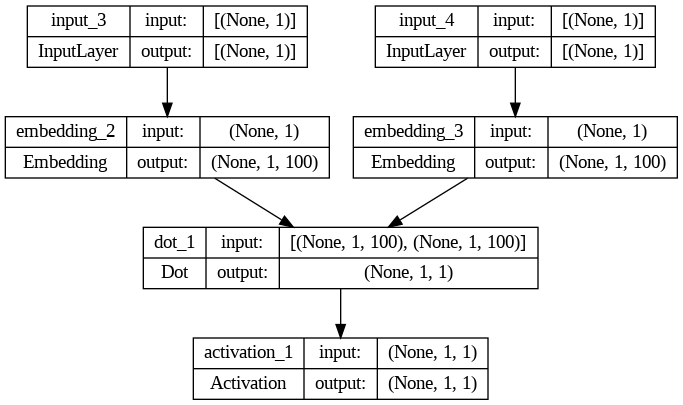

In [112]:
# 시각화
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [113]:
# 이 부분 다시 한번 봐야겠다 왜 남들은 되는데 나는 안되는거지
for epoch in range(100):
    loss = 0
    for _, elem in enumerate(skip_grams):
        first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')
        second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')
        labels = np.array(elem[1], dtype='int32')
        X = [first_elem, second_elem]
        Y = labels
        loss += model.train_on_batch(X, Y)
    print('Epoch:', epoch+1, 'Loss: ', loss)
    #  ValueError: `logits` and `labels` must have the same shape, received ((2900, 1, 1) vs (2900,)).

ValueError: ignored

In [114]:
for _, elem in enumerate(skip_grams):
  # print(elem) # 이거 가지고 어떻게?
  first_elem = np.array(list(zip(*elem[0]))[0], dtype='int32')

  second_elem = np.array(list(zip(*elem[0]))[1], dtype='int32')

  print(first_elem) # 하나 자체가 이제 다나옴
  print(second_elem)

[   390  44730 560752 ... 560747  70080     52]
[1001851  338149     390 ...  772297  560746  186924]
[560753  41051   3184 ...  10875  23833   2067]
[ 872618  426080   97830 ...  106337 1280892    8860]
[ 31636  21575  65542 ...   3074    557 338153]
[ 54822  75483     55 ... 814253    130 204495]
[ 54823   1452 162305 ...   3663  10471 162305]
[ 162305   49179  891041 ... 1285755  912401  959716]
[61562   213   213 ... 33859  3112   718]
[369114 622886 656893 ...    171 579606  25803]
[31639  8531   591 ...    42   591   851]
[195794 108415 247552 ... 281170 272000 207056]
[  53   62 5041 ...  832   13 4777]
[1187777  639604   16075 ... 1125579  560769     395]
[  2865 162309 247555 ...  51861  61563   1353]
[635324   8457   3057 ... 666265 681593 641001]
[560777  89018   3645 ...  32726 247559 195801]
[  58024  206260  139182 ...  980554 1044199     533]
[   115 139184      3 ...   2105     65   4747]
[   2573      27    2105 ...  933701  404156 1180302]
[ 36395   8141   5656 ...  2

In [115]:
f = open('vectors.txt','w')
f.write('{} {}\n'.format(vocab_size-1, embedding_dim)) # vocab의 사이즈 -1개가 전체 찍힘
vectors = model.get_weights()[0]
# print(vectors)

for word, i in tokenizer.word_index.items():
  f.write('{} {}\n'.format(word, ' '.join(map(str, list(vectors[i, :])))))
f.close()

# 왜 만들까? 이거를 가져와갖고 사용할 수 있게끔
# 로드해서 바로, 가중치가 적용된 것을 잊어먹지 않고 쓰지 않게

In [117]:
import gensim

In [118]:
w2v = gensim.models.KeyedVectors.load_word2vec_format('./vectors.txt', binary=False)

In [119]:
w2v.most_similar(positive=['기술지식'])

[('33명을', 0.4546351730823517),
 ('금형공업협동조합과', 0.4543410837650299),
 ('근로유형에', 0.45396003127098083),
 ('분절성으로', 0.4470941424369812),
 ('협력체가', 0.4436172544956207),
 ('bismayah', 0.43271398544311523),
 ('지대창출', 0.4264114797115326),
 ('新실크로드', 0.4255157709121704),
 ('사형선택여부판단은', 0.4218997359275818),
 ('해양자원에', 0.4195273220539093)]

In [120]:
w2v.most_similar(positive=['웰니스'])

[('설계변수를', 0.44581544399261475),
 ('억지스럽게', 0.4427480101585388),
 ('통찰하게', 0.4304325580596924),
 ('위로보다', 0.4251515865325928),
 ('역사탐방과', 0.42092519998550415),
 ('lsoas가', 0.4207964539527893),
 ('차별시정에', 0.420743852853775),
 ('거둬들이면서', 0.42034608125686646),
 ('연계지역은', 0.415728896856308),
 ('도시민박업은', 0.4148945212364197)]

In [121]:
w2v.most_similar(positive=['요금'])

[('국가역량으로', 0.49451231956481934),
 ('유관기관에서', 0.47005733847618103),
 ('토양염농도', 0.45835351943969727),
 ('제출문제', 0.4498777687549591),
 ('해양과학분야에', 0.44741570949554443),
 ('농촌지역에서의', 0.445326566696167),
 ('이상탈의라고', 0.4427643120288849),
 ('인권정책과', 0.44254350662231445),
 ('할인권', 0.44251975417137146),
 ('조건들에', 0.4303722083568573)]

In [122]:
w2v.most_similar(positive=['사회적'])

[('고용보호법이', 0.47141358256340027),
 ('사용했을까', 0.450730562210083),
 ('확산기능으로', 0.4465535879135132),
 ('형사관할권을', 0.4464931786060333),
 ('명령하는', 0.43301844596862793),
 ('출원서비스표를', 0.4315354526042938),
 ('보장수준을', 0.41870972514152527),
 ('토지등소유자에서', 0.41595956683158875),
 ('실무지도자를', 0.4148727059364319),
 ('우닌우', 0.4142175316810608)]